# 해시태그 데이터로 워드클라우드 만들기

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import files
uploaded = files.upload()
filename= list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스 (1).csv


In [4]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [4]:
tags = raw_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [5]:
tags[2:-2].split("', '")[:5]    #너무 많아서 다섯개만 보려고 5

['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [6]:
a = ['#시작']
a.extend(tags[2:-2].split("', '")[:5])
a

['#시작', '#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [7]:
tags_total = []
for tags in raw_df.tags:
  tags_total.extend(tags[2:-2].split("', '"))

## 해시태그 출현 빈도

* collections 모듈 - counter

In [8]:
from collections import Counter, OrderedDict

In [9]:
s = 'A quick brown.'
Counter(s)

Counter({' ': 2,
         '.': 1,
         'A': 1,
         'b': 1,
         'c': 1,
         'i': 1,
         'k': 1,
         'n': 1,
         'o': 1,
         'q': 1,
         'r': 1,
         'u': 1,
         'w': 1})

In [10]:
sl = ['A', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
Counter(sl)

Counter({'A': 1,
         'brown': 1,
         'dog.': 1,
         'fox': 1,
         'jumps': 1,
         'lazy': 1,
         'over': 1,
         'quick': 1,
         'the': 1})

In [11]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d


{'k': 2, 'm': 3, 'x': 1}

In [12]:
od = OrderedDict()    #순서가 있는 dictionary
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [13]:
for k, v in od.items():
  print(k, v)

x 1
k 2
m 3


* 해시태그 빈도 집계

In [3]:
import pandas as pd
raw_df = pd.read_csv('제주핫플레이스.csv')
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [19]:
tags_counts = Counter(tags_total)

In [20]:
# top50

tag_counts.most_common(50)    #couter로 만든 것이라 most_commor으로

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주속눈썹', 397),
 ('#서귀포남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포속눈썹', 395),
 ('#서귀포반영구', 395),
 ('#먹스타그램', 395),
 ('#맞팔', 388),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#소통', 374),
 ('#애월맛집', 373),
 ('#daily', 360)]

In [30]:
# 데이터 정제하기
stopwords = ['#jeju', '#일상', '', '#제주', '#제주도', '#선팔', '#제주눈썹문신', '#서귀포눈썹문신', '#반영구', '#눈썹문신', '#제주자연눈썹', '#제주일상', '#제주시', '#여행', '#소통', '#daily', '#서귀포반영구', '#제주남자눈썹문신', '#서귀포자연눈썹', '#서귀포남자눈썹문신', '#제주속눈썹', '#여행']
#tag_total_refined = []
#for tag in tags_total:
#  if tag not in stopwords:
#    tag_total_refined.append(tag)

In [31]:
tags_total = [tag for tag in tags_total if tag not in stopwords]
tag_counts = Counter(tag_total)
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주속눈썹', 397),
 ('#서귀포남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포속눈썹', 395),
 ('#서귀포반영구', 395),
 ('#먹스타그램', 395),
 ('#맞팔', 388),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#소통', 374),
 ('#애월맛집', 373),
 ('#daily', 360)]

### 워드 클라우드 만들기

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [41]:
! ls -l /usr/share/fonts/truetype/nanum

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


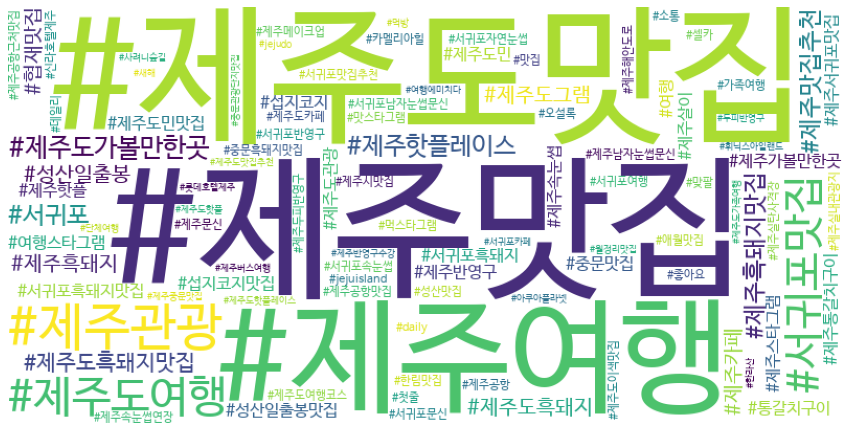

In [42]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wordcloud =  WordCloud(font_path = path,
                       background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()